# Explore here

In [1]:
# Imports
# Basics
import pandas as pd
import numpy as np

# VISUALIZACION
import matplotlib.pyplot as plt
import seaborn as sns

# ESCALAMIENTO
from sklearn.preprocessing import MinMaxScaler

# MODELOS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# METRICAS
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

# GUARDADO DEL MODELO
from pickle import dump

# OTROS UTILES
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/sergio-roque-decision-tree/refs/heads/main/data/processed/train_data.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/sergio-roque-decision-tree/refs/heads/main/data/processed/test_data.csv")

In [3]:
X_train = train_data.drop("Outcome", axis=1)
y_train = train_data["Outcome"]

X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]

In [4]:
# Escalado
# Instancio el escalador
scaler = MinMaxScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplico el escalador en ambos
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.529412,0.696774,0.633333,0.293478,0.326403,0.503145,0.346318,0.200000
1,0.117647,0.845161,0.800000,0.239130,0.224532,0.147799,0.103596,0.016667
2,0.117647,0.541935,0.633333,0.326087,0.349272,0.789308,0.488014,0.166667
3,0.470588,0.406452,0.666667,0.239130,0.224532,0.201258,0.330479,0.216667
4,0.235294,0.509677,0.666667,0.086957,0.336798,0.433962,0.153682,0.216667


In [5]:
# SELECCIONARE PARAMETROS MAS RELEVANTES AL FINAL DE SER NECESARIO

X_test_sel = X_test_scal.copy()

X_train_sel = X_train_scal.copy()
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.529412,0.696774,0.633333,0.293478,0.326403,0.503145,0.346318,0.200000
1,0.117647,0.845161,0.800000,0.239130,0.224532,0.147799,0.103596,0.016667
2,0.117647,0.541935,0.633333,0.326087,0.349272,0.789308,0.488014,0.166667
3,0.470588,0.406452,0.666667,0.239130,0.224532,0.201258,0.330479,0.216667
4,0.235294,0.509677,0.666667,0.086957,0.336798,0.433962,0.153682,0.216667


In [6]:
# modelos
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state = 42, use_label_encoder=False, eval_metric='mlogloss')
lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state = 42)

# entrenamiento
ada.fit(X_train_sel, y_train)
gb.fit(X_train_sel, y_train)
xgb.fit(X_train_sel, y_train)
lgb.fit(X_train_sel, y_train)

[LightGBM] [Info] Number of positive: 218, number of negative: 392
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 610, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357377 -> initscore=-0.586767
[LightGBM] [Info] Start training from score -0.586767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=42)

In [7]:
# predicción
ada_y_pred_test = ada.predict(X_test_sel)
gb_y_pred_test = gb.predict(X_test_sel)
xgb_y_pred_test = xgb.predict(X_test_sel)
lgb_y_pred_test = lgb.predict(X_test_sel)

ada_y_pred_train = ada.predict(X_train_sel)
gb_y_pred_train = gb.predict(X_train_sel)
xgb_y_pred_train = xgb.predict(X_train_sel)
lgb_y_pred_train = lgb.predict(X_train_sel)

In [8]:
# metricas
ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_accuracy_train = accuracy_score(y_train, ada_y_pred_train)

gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)

xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)

lgb_accuracy_test = accuracy_score(y_test, lgb_y_pred_test)
lgb_accuracy_train = accuracy_score(y_train, lgb_y_pred_train)

print('AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)
print(25*"-")
print('Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)
print(25*"-")
print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)
print(25*"-")
print('LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)

AdaBoost
Accuracy Test:  0.7777777777777778
Accuracy Train:  0.7754098360655738
-------------------------
Gradient Boosting
Accuracy Test:  0.7843137254901961
Accuracy Train:  0.9
-------------------------
XGBoost
Accuracy Test:  0.7777777777777778
Accuracy Train:  1.0
-------------------------
LightGBM
Accuracy Test:  0.7450980392156863
Accuracy Train:  1.0


In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7], # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage used in update to prevent overfitting.
    'subsample': [0.8, 1.0], # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0], # is the subsample ratio of columns when constructing each tree
    'min_split_loss': [0, 1, 5] # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Entrena el Grid Search
grid_search.fit(X_train_sel, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/workspaces/sergio-roque-boosting/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:51:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sergio-roque-boosting/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:51:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sergio-roque-boosting/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:51:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sergio-roque-boosting/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:51:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_split_loss': [0, 1, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [10]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)

Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_split_loss': 1, 'n_estimators': 200, 'subsample': 0.8}
Mejor score: 0.777049180327869


In [11]:
xgb = XGBClassifier(colsample_bytree=0.8, 
                    gamma=1, 
                    learning_rate=0.01, 
                    max_depth=5, 
                    n_estimators=200, 
                    subsample=0.8, 
                    random_state = 42, 
                    use_label_encoder=False, 
                    eval_metric='mlogloss')

In [12]:
xgb.fit(X_train_sel, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [13]:
xgb_y_pred_test = xgb.predict(X_test_sel)
xgb_y_pred_train = xgb.predict(X_train_sel)

In [14]:
xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)

f1_score_test = f1_score(y_test, xgb_y_pred_test, average='micro')
f1_score_train = f1_score(y_train, xgb_y_pred_train, average='micro')

precision_test = precision_score(y_test, xgb_y_pred_test, average='micro')
precision_train = precision_score(y_train, xgb_y_pred_train, average='micro')

recall_test = recall_score(y_test, xgb_y_pred_test, average='micro')
recall_train = recall_score(y_train, xgb_y_pred_train, average='micro')

print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", xgb_accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

XGBoost
Accuracy Test:  0.7843137254901961
F1 score Test:  0.7843137254901961
Precision Test:  0.7843137254901961
Recall Test:  0.7843137254901961
Accuracy Train:  0.8737704918032787
F1 score Train:  0.8737704918032787
Precision Train:  0.8737704918032787
Recall Train:  0.8737704918032787


In [15]:
dump(xgb, open("../models/xgboosting_optimized_42.sav", "wb"))

Con los parametros escogidos para el grid search me da una mejora en el modelo de un 1% de accuracy pero una notable mejoría en cuanto al overfitting, por ahora nos quedaremos con este modelo optimizado y quedaría pendiente probar muchas mas combinaciones en el grid search y ver si mejora notablemente el resultado.

Resultados de los 3 modelos probados en este set de datos:
- Decision Tree:
  + Accuracy Test:  0.7450980392156863
  + F1 score Test:  0.7450980392156863
  + Precision Test:  0.7450980392156863
  + Recall Test:  0.7450980392156863

- Random Forest:
  - Accuracy Test:  0.8104575163398693
  - F1 score Test:  0.8104575163398693
  - Precision Test:  0.8104575163398693
  - Recall Test:  0.8104575163398693

- XGBoost:
  - Accuracy Test:  0.7843137254901961
  - F1 score Test:  0.7843137254901961
  - Precision Test:  0.7843137254901961
  - Recall Test:  0.7843137254901961

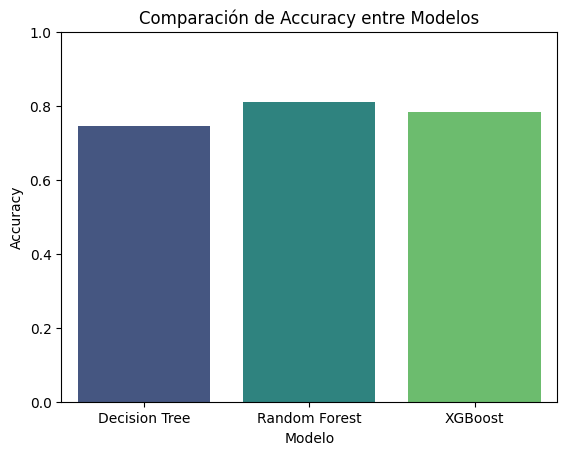

In [16]:
accuracy_dec_tree = 0.7450980392156863
accuracy_random_f = 0.8104575163398693
accuracy_xgboost = 0.7843137254901961

data = pd.DataFrame({
    'Modelo': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_dec_tree, accuracy_random_f, accuracy_xgboost]
})

sns.barplot(data=data, x='Modelo', y='Accuracy', palette='viridis')

plt.ylim(0, 1)
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.show()

De los modelos utilizados, teniendo **siempre** en cuenta lo siguiente:
- Con el análisis exploratorio de variables realizado
- La selección de parámetros en caso de que se haya hecho
- El manejo de valores atípicos
- El escalado de las variables
- La búsqueda de parámetros de optimización para dichos modelos
- **La naturaleza de mis datos y la cantidad de los mismos**  

El mejor modelo para predecir la presencia o no de diabetes en un paciente dados sus datos será nuestro modelo optimizado de Random Forest